#  Homework 5 - Berkeley STAT 157

**Your name: CHEOLHO JANG, 3032219997(Please add your name, and SID to ease Ryan and Rachel to grade.)

**Please submit your homework through [gradescope](http://gradescope.com/) instead of Github, so you will get the score distribution for each question. Please enroll in the [class](https://www.gradescope.com/courses/42432) by the Entry code: MXG5G5** 

Handout 2/19/2019, due 2/26/2019 by 4pm in Git by committing to your repository.

In this homework, we will model covariate shift and attempt to fix it using logistic regression. This is a fairly realistic scenario for data scientists. To keep things well under control and understandable we will use [Fashion-MNIST](http://d2l.ai/chapter_linear-networks/fashion-mnist.html) as the data to experiment on. 

Follow the instructions from the Fashion MNIST notebook to get the data.

In [1]:
%matplotlib inline
import mxnet
from mxnet import autograd, gluon, init, nd
from mxnet.gluon import data as gdata, loss as gloss, nn, utils
import numpy as np

import matplotlib.pyplot as plt
import sys
import d2l
sys.path.insert(0, '..')
mnist_train = gdata.vision.FashionMNIST(train=True)
mnist_test = gdata.vision.FashionMNIST(train=False)

## 1. Logistic Regression

1. Implement the logistic loss function $l(y,f) = -\log(1 + \exp(-y f))$ in Gluon.
2. Plot its values and its derivative for $y = 1$ and $f \in [-5, 5]$, using automatic differentiation in Gluon.
3. Generate training and test datasets for a binary classification problem using Fashion-MNIST with class $1$ being a combination of `shirt` and `sweater` and class $-1$ being the combination of `sandal` and `sneaker` categories. 
4. Train a binary classifier of your choice (it can be linear or a simple MLP such as from a previous lecture) using half the data (i.e. $12,000$ observations mixed as abvove) and one using the full dataset (i.e. $24,000$ observations as arising from the 4 categories) and report its accuracy. 

Hint - you should encapsulate the training and reporting code in a callable function since you'll need it quite a bit in the following. 

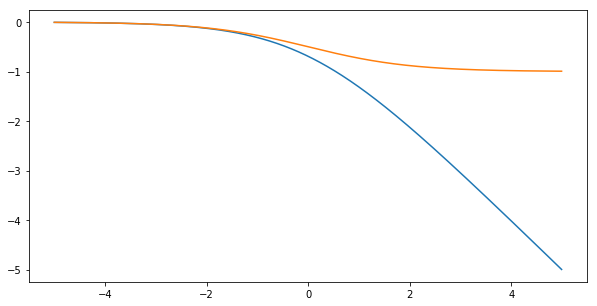

In [2]:
from matplotlib import pyplot as plt
x = nd.arange(-5, 5, 0.01)
x.attach_grad()
with autograd.record():
    l = -nd.log(1+nd.exp(1*x))
l.backward()
p = nd.exp(-l)
p = 100 * p / p.sum()
plt.figure(figsize=(10, 5))
plt.plot(x.asnumpy(), l.asnumpy())
plt.plot(x.asnumpy(), x.grad.asnumpy())
plt.show()

In [11]:
percentage = .5



class_1 = []
class_neg_1 = []
combined_train = []
newcombined = []


for weight, label in mnist_train:
    class_1_labels = [2,6]
    class_neg_1_labels = [5,7]
    if label in class_1_labels:
        class_1.append((weight,label))
        combined_train.append((weight,label))
            #print(label)
    elif label in class_neg_1_labels:
        class_neg_1.append((weight,label))
        combined_train.append((weight,label))
        #print(label)
    else:
        continue

class_1 = class_1[:int(round(len(combined_train) * percentage))]
class_neg_1 = class_neg_1[:int(round(len(combined_train) * (1- percentage)))]
combined_train = []
for i in class_1:
    combined_train.append(i)
for i in class_neg_1:
    combined_train.append(i)


In [13]:
combined_train[0]

(
 [[[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]
 
  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]
 
  [[  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]]
 
  [[  0]
   [  0]
   [  0]
   [  0]
   [  4]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [ 62]
   [ 61]
   [ 21]
   [ 29]
   [ 23]
   [ 51]
   [136]
   [ 61]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]
   [  0]

In [19]:
def func(perc):
    percentage = perc



    class_1 = []
    class_neg_1 = []
    combined_train = []


    for weight, label in mnist_train:
        class_1_labels = [2,6]
        class_neg_1_labels = [5,7]
        if label in class_1_labels:
            class_1.append((weight,label))
            combined_train.append((weight,label))
            #print(label)
        elif label in class_neg_1_labels:
            class_neg_1.append((weight,label))
            combined_train.append((weight,label))
            #print(label)
        else:
            continue
    
    

    class_1 = class_1[:int(round(len(combined_train) * percentage))]
    class_neg_1 = class_neg_1[:int(round(len(combined_train) * (1- percentage)))]
    combined_train = []
    for i in class_1:
        combined_train.append(i)
    for i in class_neg_1:
        combined_train.append(i)


    class_1_test = []
    class_neg_1_test = []
    combined_test = []


    for weight, label in mnist_test:
        class_1_labels = [2,6]
        class_neg_1_labels = [5,7]
        if label in class_1_labels:
            class_1_test.append((weight,label))
            combined_test.append((weight,label))
            #print(label)
        elif label in class_neg_1_labels:
            class_neg_1_test.append((weight,label))
            combined_test.append((weight,label))
            #print(label)
        else:
            continue

    class_1_test = class_1_test[:int(round(len(combined_test) * percentage))]
    class_neg_1_test = class_neg_1_test[:int(round(len(combined_test) * (1- percentage)))]
    combined_test = []
    for i in class_1:
        combined_test.append(i)
    for i in class_neg_1:
        combined_test.append(i)

    
    batch_size = 256

    if sys.platform.startswith('win'):
        # 0 means no additional processes are needed to speed up the reading of
        # data
        num_workers = 0
    else:
        num_workers = 4

    train_iter = gdata.DataLoader(gluon.data.ArrayDataset(combined_train),batch_size=batch_size, num_workers = num_workers, shuffle=True)
    test_iter = gdata.DataLoader(gluon.data.ArrayDataset(combined_test),batch_size=batch_size, num_workers = num_workers, shuffle=True)

    #for X, y in train_iter:
    #    print(X, y)
    #    break
    net = nn.Sequential()
    net.add(nn.Dense(1))
    net.initialize(init.Normal(sigma=0.01))
    loss = gloss.L2Loss()  
    trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.03})
    num_epochs = 1
    for epoch in range(1, num_epochs + 1):
        for X, y in train_iter:
            print(X)
            with autograd.record():
                l = loss(net(X), y)
            l.backward()
            trainer.step(batch_size)
        l = loss(net(features), labels)
        print('epoch %d, loss: %f' % (epoch, l.mean().asnumpy()))


func(.5)


[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]


 ...


 [[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0

MXNetError: [00:59:32] src/operator/contrib/../elemwise_op_common.h:123: Check failed: assign(&dattr, (*vec)[i]) Incompatible attr in node  at 1-th input: expected uint8, got float32

Stack trace returned 9 entries:
[bt] (0) 0   libmxnet.so                         0x0000000119daa591 dmlc::StackTrace() + 305
[bt] (1) 1   libmxnet.so                         0x0000000119daa31f dmlc::LogMessageFatal::~LogMessageFatal() + 47
[bt] (2) 2   libmxnet.so                         0x0000000119e6f67b bool mxnet::op::ElemwiseAttr<int, &(mxnet::op::type_is_none(int const&)), &(mxnet::op::type_assign(int*, int const&)), true, &(mxnet::op::type_string(int const&)), -1, -1>(nnvm::NodeAttrs const&, std::__1::vector<int, std::__1::allocator<int> >*, std::__1::vector<int, std::__1::allocator<int> >*, int const&)::'lambda'(std::__1::vector<int, std::__1::allocator<int> >*, unsigned long, char const*)::operator()(std::__1::vector<int, std::__1::allocator<int> >*, unsigned long, char const*) const + 1355
[bt] (3) 3   libmxnet.so                         0x000000011a0188a9 mxnet::op::FullyConnectedType(nnvm::NodeAttrs const&, std::__1::vector<int, std::__1::allocator<int> >*, std::__1::vector<int, std::__1::allocator<int> >*) + 345
[bt] (4) 4   libmxnet.so                         0x000000011b0785b7 mxnet::imperative::SetShapeType(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, mxnet::DispatchMode*) + 2711
[bt] (5) 5   libmxnet.so                         0x000000011b076bac mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&) + 508
[bt] (6) 6   libmxnet.so                         0x000000011afefb42 MXImperativeInvokeImpl(void*, int, void**, int*, void***, int, char const**, char const**) + 386
[bt] (7) 7   libmxnet.so                         0x000000011aff0b8e MXImperativeInvokeEx + 190
[bt] (8) 8   libffi.6.dylib                      0x000000010a8b5884 ffi_call_unix64 + 76



## 2. Covariate Shift

Your goal is to introduce covariate shit in the data and observe the accuracy. For this, compose a dataset of $12,000$ observations, given by a mixture of `shirt` and `sweater` and of `sandal` and `sneaker` respectively, where you use a fraction $\lambda \in \{0.05, 0.1, 0.2, \ldots 0.8, 0.9, 0.95\}$ of one and a fraction of $1-\lambda$ of  the other datasets respectively. For instance, you might pick for $\lambda = 0.1$ a total of $600$ `shirt` and $5,400$ `sweater` images and likewise $600$ `sandal` and $5,400$ `sneaker` photos, yielding a total of $12,000$ images for training. Note that the test set remains unbiased, composed of $2,000$ photos for the `shirt` + `sweater` category and of the `sandal` + `sneaker` category each.

1. Generate training sets that are appropriately biased. You should have 11 datasets.
2. Train a binary classifier using this and report the test set accuracy on the unbiased test set. 

In [21]:
percs = [.005,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95]
for perc in percs:
    print(func(perc))


[[[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[  2]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  1]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]


 [[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[ 45]
   [119]
   [108]
   ...
   [185]
   [210]
   [ 59]]

  [[  0]
   [  0]
   [ 19]
   ...
   [ 43]
   [ 47]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]]


 [[[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  [[  0]
   [  0]
   [  0]
   ...
   [  0]
   [  0]
   [  0]]

  ...

  [[  0]
   [  0]
   [  0]
  

MXNetError: [01:00:09] src/operator/contrib/../elemwise_op_common.h:123: Check failed: assign(&dattr, (*vec)[i]) Incompatible attr in node  at 1-th input: expected uint8, got float32

Stack trace returned 9 entries:
[bt] (0) 0   libmxnet.so                         0x0000000119daa591 dmlc::StackTrace() + 305
[bt] (1) 1   libmxnet.so                         0x0000000119daa31f dmlc::LogMessageFatal::~LogMessageFatal() + 47
[bt] (2) 2   libmxnet.so                         0x0000000119e6f67b bool mxnet::op::ElemwiseAttr<int, &(mxnet::op::type_is_none(int const&)), &(mxnet::op::type_assign(int*, int const&)), true, &(mxnet::op::type_string(int const&)), -1, -1>(nnvm::NodeAttrs const&, std::__1::vector<int, std::__1::allocator<int> >*, std::__1::vector<int, std::__1::allocator<int> >*, int const&)::'lambda'(std::__1::vector<int, std::__1::allocator<int> >*, unsigned long, char const*)::operator()(std::__1::vector<int, std::__1::allocator<int> >*, unsigned long, char const*) const + 1355
[bt] (3) 3   libmxnet.so                         0x000000011a0188a9 mxnet::op::FullyConnectedType(nnvm::NodeAttrs const&, std::__1::vector<int, std::__1::allocator<int> >*, std::__1::vector<int, std::__1::allocator<int> >*) + 345
[bt] (4) 4   libmxnet.so                         0x000000011b0785b7 mxnet::imperative::SetShapeType(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, mxnet::DispatchMode*) + 2711
[bt] (5) 5   libmxnet.so                         0x000000011b076bac mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&) + 508
[bt] (6) 6   libmxnet.so                         0x000000011afefb42 MXImperativeInvokeImpl(void*, int, void**, int*, void***, int, char const**, char const**) + 386
[bt] (7) 7   libmxnet.so                         0x000000011aff0b8e MXImperativeInvokeEx + 190
[bt] (8) 8   libffi.6.dylib                      0x000000010a8b5884 ffi_call_unix64 + 76



## 3. Covariate Shift Correction

Having observed that covariate shift can be harmful, let's try fixing it. For this we first need to compute the appropriate propensity scores $\frac{dp(x)}{dq(x)}$. For this purpose pick a biased dataset, let's say with $\lambda = 0.1$ and try to fix the covariate shift.

1. When training a logistic regression binary classifier to fix covariate shift, we assumed so far that both sets are of equal size. Show that re-weighting data in training and test set appropriately can help address the issue when both datasets have different size. What is the weighting?
2. Train a binary classifier (using logistic regression) distinguishing between the biased training set and the unbiased test set. Note - you need to weigh the data. 
3. Use the scores to compute weights on the training set. Do they match the weight arising from the biasing distribution $\lambda$? 
4. Train a binary classifier of the covariate shifted problem using the weights obtained previously and report the accuracy. Note - you will need to modify the training loop slightly such that you can compute the gradient of a weighted sum of losses. 
